Arbeidskrav 5

In [198]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132')
table_html=tables[0]

In [199]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

In [200]:
';'.join(table[0])

'                Modell (temp. varierte fra 0° til -10°)                ;                WLTP-tall                ;                STOPP                ;                Avvik                '

In [201]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('motor.csv',table)

In [202]:
import pandas as pd
motor = pd.read_csv('motor.csv', delimiter=';', encoding='latin1')

motor.columns= motor.columns.str.replace(" ","")

In [203]:
motor[['Kilometer','Strømforbruk']] = motor['WLTP-tall'].str.split('/',expand=True)
motor = motor.drop(columns=['Avvik','WLTP-tall','Strømforbruk'])

In [204]:
motor["Kilometer"] = motor["Kilometer"].str.replace("km","")
motor["STOPP"] = motor["STOPP"].str.replace("km","")

In [205]:
motor = motor[~motor["STOPP"].str.contains("x")]

In [206]:
motor['STOPP'] = motor['STOPP'].astype(int)
motor["Kilometer"] = motor["Kilometer"].astype(int)

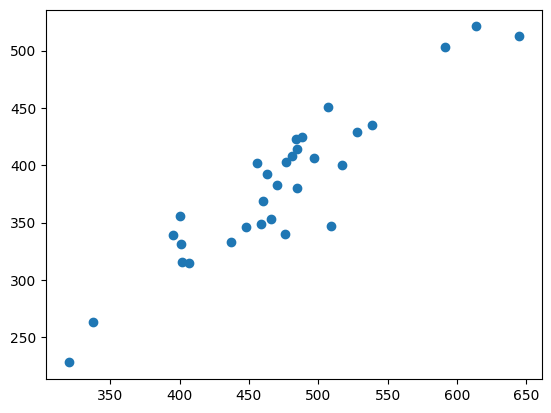

In [207]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

ax.scatter(motor["Kilometer"],motor["STOPP"])

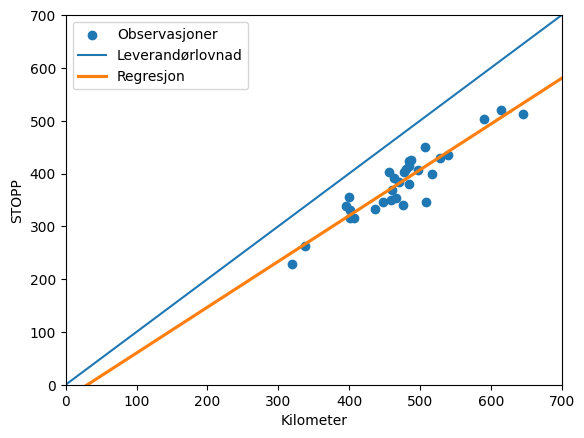

In [208]:
fig,ax=plt.subplots()
ax.set_xlim(0,700)
ax.set_ylim(0,700)

x_num = np.linspace(0,800, 100)


ax.scatter(motor["Kilometer"],motor["STOPP"],label='Observasjoner')
ax.plot(x_num,x_num,label='Leverandørlovnad')
sns.regplot(x='Kilometer',y='STOPP',data=motor,truncate=False,ci=None,scatter=False,label='Regresjon')

ax.legend(loc='best')